In [1]:
# Ignore cuDDa warning messages
import warnings
import os
warnings.filterwarnings('ignore')

# Enable GPU
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# # Expands the Jupyter Notebook Output Size to fit your window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Change the working directory back to the original to keep paths the same between files
os.chdir(r'C:\Users\Maxwell\PycharmProjects\TAMU-ECEN-403-IFPTSND\ECEN_403_IFM\TAMU-ECEN-403-IFPTSND')

# warnings.filterwarnings('ignore')
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
%%javascript
    IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [3]:
# Import all of my custom files
from tensorflow_models import *
from explore_entities import *
from graph_predictions import *

In [4]:
# Create our model generator object
dataset_path = './ignorable_data/data_sets/NASDAQ_Cleaned - Contains ZUMZ/'
model_path = './ignorable_data/models/[40, 40, 20]_split/'
DMJ = TF_Models(dataset_path, model_path, reload=False, perc_split=[1,1,98])

In [5]:
# Create a model
DMJ.generate_model()

GridBox(children=(Dropdown(description='Model Types:', options=('lstm', 'explicit_gcn', 'implicit_gcn', 'lstm_…

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12, 5)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 12, 32)            4864      
_________________________________________________________________
dense (Dense)                (None, 12, 1)             33        
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
5/5 [==============================] - 0s 69ms/step - loss: 1.0106 - val_loss: 0.8563
Epoch 2/10
5/5 [==============================] - 0s 65ms/step - loss: 0.7341 - val_loss: 0.5232
Epoch 3/10
5/5 [==============================] - 0s 61ms/step - loss: 0.4254 - val_loss: 0.2746
Epoch 4/10
5/5 [==============================] - 0s 64ms/step - loss: 0.2192 - val_loss: 0.1555
Epoch 5/10
5/5 [==============================] - 0s 58ms/step - loss: 0.1493 - val_loss: 0.1608
Epoch 6/10
5/5 [==============================] - 0s 63ms/step - loss: 0.1592 - val_loss: 0.1542
Epoch 7/10
5/5 [==============================] - 0s 64ms/step - loss: 0.1399 - val_loss: 0.1231
Epoch 8/10
5/5 [==============================] - 0s 60ms/step - loss: 0.1136 - val_loss: 0.1065
Epoch 9/10
5/5 [==============================] - 0s 64ms/step - loss: 0.1024 - val_loss: 0.1006
Epoch 10/10
5/5 [==============================] - 0s 63ms/step - loss: 0.0971 - val_loss: 0.0947


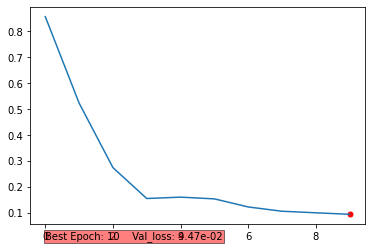

In [6]:
# Train a model
DMJ.train(epochs=10, batch_size=200)

In [7]:
DMJ.save_model()
print(DMJ.model_name)

04-20-2021--20--43-lstm-10Epochs-rank_loss-32-HU-


In [ ]:
# Create an object for creating models
GP = Graph_Predictions(model_path,  DMJ)

In [ ]:
# Where the prediction will be saved
prediction_path = './ignorable_data/prediction_results/'

# The data that the model is able to see
past = DMJ.data_splits['x_val']

# The data that the model will predict over and incrementally see
future = DMJ.data_splits['x_test']

# The size of the time-window
window = DMJ.data_splits['x_train'].shape[1]

# Generate the predictions for every company on every day
GP.generate_predictions(None, model_path, past, future, prediction_path, window, model_type='lstm', batch_size=881)

In [ ]:
datablock_path = './ignorable_data/datablocks/[55, 25, 20]_splits/'
prediction_file = GP.most_recent_prediction_file

# Using the prediction file, execute trading strategies over the dataset
GP.generate_prediction_results_avg(AVG=1, prediction_file, prediction_path, future, datablock_path)

In [ ]:
GP.compare_data_blocks(datablock_path)